# One-Zone Model Degeneracies

Looking for degeneracies between Ia DTD and other parameters in the one-zone model outputs.

In [5]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
import vice
from vice.yields.presets import JW20

# Plot settings
plt.rcParams.update({
    'xtick.direction': 'in',
    'xtick.top': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.dpi': 140,
    'figure.figsize': (4, 4),
    'font.family': 'STIXgeneral',
    'mathtext.fontset': 'cm',
})

In [2]:
# Import data
# data_dir = 'C:\\Users\\dubay.11\\OneDrive - The Ohio State University\\Documents\\Docs\\First Year Project\\Data'
data_dir = '~/Documents/Data'
data = pd.read_csv(Path(data_dir) / 'dr17_cut_data.csv')
data

,APOGEE_ID,TELESCOPE,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,...,APOKASC2_AGE,APOKASC2_AGE_PERR,APOKASC2_AGE_MERR,APOKASC2_AV,APOKASC2_AV_ERR,APOKASC2_NOTE,APOK2_MASS,APOK2_MASS_ERR,APOK2_RADIUS,APOK2_RADIUS_ERR
0,2M00000002+7417074,apo25m,120+12,none,0.000103,74.285408,119.401807,11.767414,8.597,0.039,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
1,2M00000032+5737103,apo25m,N7789,none,0.001335,57.619530,116.065371,-4.564768,10.905,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
2,2M00000035-7323394,lco25m,SMC12,none,0.001467,-73.394287,307.939441,-43.230305,15.008,0.045,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
3,2M00000068+5710233,apo25m,N7789,none,0.002850,57.173164,115.977154,-5.002392,10.664,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
4,2M00000133+5721163,apo25m,NGC7789_btx,none,0.005558,57.354549,116.014776,-4.824917,13.261,0.029,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408656,2M23595867-7339039,lco25m,SMC12,none,359.994493,-73.651093,307.846602,-42.982597,15.671,0.069,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
408657,2M23595886+5726058,apo25m,116-04,none,359.995265,57.434956,116.025359,-4.745011,11.466,0.024,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
408658,2M23595921+5609479,apo25m,NGC7789_MGA,none,359.996744,56.163330,115.771964,-5.991363,11.985,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
408659,2M23595949-7342592,lco25m,SMC12,none,359.997887,-73.716454,307.821174,-42.919934,15.924,0.094,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN


In [6]:
# Fiducial one-zone model
sz = vice.singlezone(name='sz_fid', elements=('fe', 'o'))
print(sz)

vice.singlezone{
    name -----------> sz_fid
    func -----------> <function _DEFAULT_FUNC_ at 0x7fb221107280>
    mode -----------> ifr
    verbose --------> False
    elements -------> ('fe', 'o')
    IMF ------------> kroupa
    eta ------------> 2.5
    enhancement ----> 1.0
    entrainment ----> <entrainment settings>
    Zin ------------> 0.0
    recycling ------> continuous
    delay ----------> 0.15
    RIa ------------> plaw
    Mg0 ------------> 6000000000.0
    smoothing ------> 0.0
    tau_ia ---------> 1.5
    tau_star -------> 2.0
    schmidt --------> False
    schmidt_index --> 0.5
    MgSchmidt ------> 6000000000.0
    dt -------------> 0.01
    m_upper --------> 100.0
    m_lower --------> 0.08
    postMS ---------> 0.1
    Z_solar --------> 0.014
    bins -----------> [-3, -2.95, -2.9, ... , 0.9, 0.95, 1]
}


In [7]:
simtime = np.linspace(0, 13.2, 1321) # Gyr
sz.run(simtime)

Plot Fe vs time, alpha vs time, and alpha vs Fe.

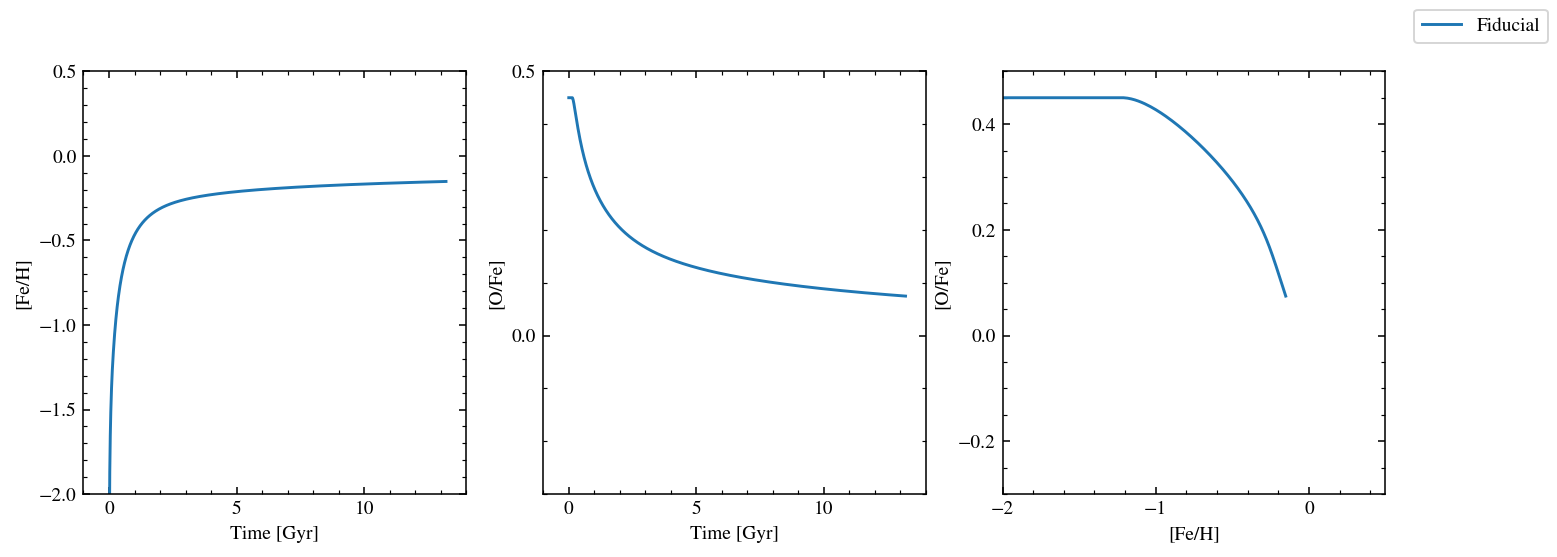

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

history = vice.history('sz_fid')
axs[0].plot(history['time'][1:], history['[fe/h]'][1:], label='Fiducial')
axs[1].plot(history['time'][1:], history['[o/fe]'][1:])
axs[2].plot(history['[fe/h]'][1:], history['[o/fe]'][1:])

tlim = (-1, 14)
felim = (-2, 0.5)
olim = (-0.3, 0.5)

# Format plot
ax = axs[0]
ax.set_xlim(tlim)
ax.set_ylim(felim)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('[Fe/H]')

ax = axs[1]
ax.set_xlim(tlim)
ax.set_ylim(olim)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('[O/Fe]')

ax = axs[2]
ax.set_xlim(felim)
ax.set_ylim(olim)
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')

fig.legend()
plt.show()

In [14]:
history['[o/fe]']

[nan,
 0.4501037191025701,
 0.4500633933039344,
 0.4500559754747804,
 0.4500588188156991,
 0.4500626433206154,
 0.45006529386636296,
 0.4500676101034127,
 0.45006946661083425,
 0.450070698022458,
 0.450070185520578,
 0.4500682003931755,
 0.45006500811539407,
 0.45006070628645256,
 0.4500557523255134,
 0.45005010148394275,
 0.449261725787792,
 0.4478782514155175,
 0.4460419446097206,
 0.4438616782524718,
 0.44142168619131983,
 0.43878702100434774,
 0.4360088918800552,
 0.43312718304273323,
 0.4301735655275474,
 0.427172924586816,
 0.4241451325445442,
 0.42110588110923297,
 0.41806757915866766,
 0.41503994896981045,
 0.41203084792532774,
 0.40904616079750783,
 0.4060911775830569,
 0.4031692514454216,
 0.4002831928171068,
 0.39743489837089774,
 0.39462571803692165,
 0.39185767018149564,
 0.389130555356095,
 0.3864452263213984,
 0.38380145949852135,
 0.3811998151559335,
 0.3786391720937409,
 0.3761195271364601,
 0.3736406021634482,
 0.3712015754596444,
 0.36880234481658813,
 0.366441643111